## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("Ly Data/chenpo_ws.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '歐珀', '發言', '委員', '歐珀', '同仁', '最近', '心情', '特別', '台灣', '國家', '聲譽', '受損', '內心', '感到', '無比', '沈痛', '台灣', '美食', '去年', '事件', '發生', '發生', '水油', '事件', '國人', '陷入', '食安', '風暴', '層出不窮', '食安', '登上', '國際', '負面', '媒體', '報導', '重創', '台灣', '美食', '王國', '形象', '本席', '政府', '歷次', '事件', '提出', '完整', '預防', '機制', 'gmp', '國家', '認證', '機制', '出包', '國家', '公信力', '蕩然無存', '此刻', '痛定思痛', '澈底', '檢討', '相關', '監理', '制度', '黑心', '廠商', '無所遁形', '歷年來', '歷經', '塑化劑', '事件', '衝擊', '檢視', '中央', '部會', '食品', '管理', '處於', '被動', '狀態', '掌控', '食安', '製造', '餿水油', '全統', '香豬油', '強冠', '公司', '食藥署', '去年', '總共', '偵查', '豬油', '偵查', '銅葉綠素', '棉籽油', '本席', '政府', '業者', '自律', '做法', 'gmp', '制度', '球員', '裁判', '國人', '信服', '制度', '妥善', '食品安全', '國人', '健康', '亡羊補牢', '本席', '呼籲', '朝野', '客觀', '公正', '地籌組', '食品安全', '毒理', '風險', '評估', '學者', '專家', '民間團體', '成立', '食品', '風險', '評估', '透過', '黨派', '組織', '執行', '公權力', '定期', '食安', '會議', '完善', '制度', '對策', '食安', '風暴', '停止']]
------------------------------


### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(16557 unique tokens: ['gmp', '中央', '事件', '亡羊補牢', '信服']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 2), (1, 1), (2, 4), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 4), (17, 2), (18, 1), (19, 3), (20, 1), (21, 1), (22, 3), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 2), (104, 2), (105, 2), (106, 5), (107, 1), (108, 1), (109

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [5]:
mallet_path = "/users/twcty/Desktop/mallet-2.0.8/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("Ly Data/chenpo_ws.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('院長', 0.0748796280923128), ('本席', 0.026066744147434835), ('政府', 0.02191598870994521), ('宜蘭', 0.01992362609995019), ('政策', 0.013282417399966794), ('行政院', 0.012286236094969285), ('地方', 0.011788145442470529), ('開發', 0.01112402457247219), ('農業', 0.010957994354972606), ('部會', 0.01079196413747302), ('臺灣', 0.010625933919973435), ('案子', 0.00946372239747634), ('特別', 0.008633571309978416), ('第一', 0.00846754109247883), ('宜蘭縣', 0.007803420222480492), ('土地', 0.007139299352482152), ('農委會', 0.006973269134982567), ('首長', 0.006807238917482982), ('農民', 0.006807238917482982), ('補助', 0.006309148264984227)]

strTM =  1[('觀光', 0.06352800953516091), ('臺灣', 0.033373063170441), ('發展', 0.026460071513706794), ('旅遊', 0.025506555423122766), ('局長', 0.0233611442193087), ('國家', 0.022884386174016686), ('世界', 0.0166865315852205), ('觀光局', 0.016209773539928488), ('台灣', 0.012753277711561383), ('旅客', 0.009892729439809296), ('人數', 0.009654350417163289), ('日本', 0.009058402860548272), ('建議', 0.008700834326579261),


 Coherence Score:  0.4572228369890916


### Finding the optimal number of topics

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
lim=36; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.3550648481117917
Num_topics:  6  Coherence Score=  0.39298811861248967
Num_topics:  9  Coherence Score=  0.41611349795256397
Num_topics:  12  Coherence Score=  0.4467251492784974
Num_topics:  15  Coherence Score=  0.46506247556974206
Num_topics:  18  Coherence Score=  0.4218336320376773
Num_topics:  21  Coherence Score=  0.4514130227066051
Num_topics:  24  Coherence Score=  0.44929836793621175
Num_topics:  27  Coherence Score=  0.4565688866768187
Num_topics:  30  Coherence Score=  0.4468032738449602
Num_topics:  33  Coherence Score=  0.4302890853193416


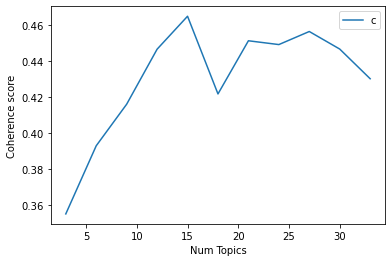

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.3551
Num Topics = 6  has Coherence Value of 0.393
Num Topics = 9  has Coherence Value of 0.4161
Num Topics = 12  has Coherence Value of 0.4467
Num Topics = 15  has Coherence Value of 0.4651
Num Topics = 18  has Coherence Value of 0.4218
Num Topics = 21  has Coherence Value of 0.4514
Num Topics = 24  has Coherence Value of 0.4493
Num Topics = 27  has Coherence Value of 0.4566
Num Topics = 30  has Coherence Value of 0.4468
Num Topics = 33  has Coherence Value of 0.4303
Optimal Topic Num = 15  Highest Value = 0.46506247556974206


###  Select the model and print the topics

In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.043*"部長" + 0.029*"賀陳" + 0.020*"東部" + 0.020*"宜蘭" + 0.020*"國道" + 0.019*"委員" '
  '+ 0.019*"鐵路" + 0.019*"交通" + 0.017*"交通部" + 0.014*"建設" + 0.013*"運輸" + '
  '0.011*"計畫" + 0.011*"解決" + 0.011*"方案" + 0.011*"歐珀" + 0.010*"塞車" + 0.010*"高鐵" '
  '+ 0.009*"政府" + 0.009*"宜蘭縣" + 0.009*"地方" + 0.007*"民眾" + 0.007*"北宜" + '
  '0.007*"提出" + 0.006*"環評" + 0.006*"時間"'),
 (1,
  '0.021*"管理" + 0.016*"臺灣" + 0.014*"業者" + 0.012*"提到" + 0.011*"確實" + 0.011*"辦法" '
  '+ 0.011*"目前" + 0.011*"服務" + 0.009*"中心" + 0.009*"提出" + 0.009*"建議" + '
  '0.009*"交通部" + 0.009*"發生" + 0.008*"落實" + 0.008*"執行" + 0.008*"機制" + '
  '0.008*"提供" + 0.008*"措施" + 0.008*"設置" + 0.007*"產業" + 0.007*"管制" + 0.007*"標準" '
  '+ 0.006*"參考" + 0.006*"建立" + 0.006*"法規"'),
 (2,
  '0.065*"委員" + 0.044*"歐珀" + 0.023*"次長" + 0.020*"國家" + 0.017*"答復" + 0.015*"本席" '
  '+ 0.014*"單位" + 0.013*"報導" + 0.011*"局長" + 0.010*"發生" + 0.010*"相關" + '
  '0.010*"參與" + 0.009*"報紙" + 0.009*"有沒有" + 0.009*"國人" + 0.008*"最近" + '
  '0.008*"監聽" + 0.008*"新聞" + 0.008*"接受" + 0.008*"官員" + 0.007

### Finding the dominant topic in each sentence

In [11]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.3600,"本席, 總統, 國家, 選舉, 社會, 政治, 民主, 國人, 賄選, 次長","[委員, 歐珀, 發言, 委員, 歐珀, 同仁, 最近, 心情, 特別, 台灣, 國家, 聲..."
1,1,3.0,0.3062,"本席, 總統, 國家, 選舉, 社會, 政治, 民主, 國人, 賄選, 次長","[委員, 歐珀, 同仁, 政治, 找回, 良心, 工作, 特偵組, 日前, 陳前, 總統, ..."
2,2,19.0,0.4043,"委員, 歐珀, 本席, 部長明, 永樂, 總統, 相關, 國防部, 預算, 國家","[委員, 歐珀, 列席, 官員, 同仁, 部長, 外交, 業務報告, 洋洋灑灑, 聆聽, 委..."
3,3,3.0,0.4680,"本席, 總統, 國家, 選舉, 社會, 政治, 民主, 國人, 賄選, 次長","[委員, 歐珀, 列席, 官員, 同仁, 國安局, 局長, 報告, 社會, 輿情, 竊聽案,..."
4,4,6.0,0.4765,"董事長, 公司, 委員, 歐珀, 交通部, 港務公司, 事業, 中華, 員工, 大仁","[委員, 歐珀, 列席, 官員, 同仁, 中研院, 副研究員, 黃國昌, 前往, 華府, 政..."
5,5,19.0,0.5444,"委員, 歐珀, 本席, 部長明, 永樂, 總統, 相關, 國防部, 預算, 國家","[委員, 歐珀, 列席, 官員, 同仁, 部長, 兩岸關係, 周邊, 情勢, 趨向, 實質,..."
6,6,10.0,0.2121,"委員, 發生, 歐珀, 相關, 調查, 地方, 局長, 報告, 工作, 民眾","[委員, 歐珀, 列席, 官員, 同仁, 主委, 高雄, 發生, 氣爆, 新店, 保安, 社..."
7,7,11.0,0.3799,"交通部, 賀陳, 國道, 鐵路, 局長, 交通, 宜蘭, 東部, 運輸, 地方","[委員, 歐珀, 同仁, 交通部, 高公局, 月份, 預警, 國道, 實施, 差別, 費率,..."
8,8,12.0,0.4226,"政府, 中國, 台灣, 大陸, 經濟, 國家, 影響, 本席, 產業, 企業","[委員, 歐珀, 列席, 官員, 同仁, 中國, 國際, 社會, 台灣, 打壓, 著痕, 台..."
9,9,11.0,0.4978,"交通部, 賀陳, 國道, 鐵路, 局長, 交通, 宜蘭, 東部, 運輸, 地方","[委員, 歐珀, 列席, 官員, 同仁, 部長, 辛苦, 國道, 試辦, 差別, 費率, 有..."


### Find the most representative document for each topic

In [12]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4353,"院長, 本席, 政府, 宜蘭, 政策, 行政院, 地方, 開發, 農業, 部會","[委員, 歐珀, 列席, 官員, 同仁, 部長, 口口聲聲, 依法, 辦理, 聽證會, 辦理..."
1,1.0,0.6778,"觀光, 臺灣, 發展, 旅遊, 局長, 國家, 世界, 觀光局, 台灣, 旅客","[委員, 歐珀, 列席, 官員, 同仁, 觀光局, 分鐘, 臺灣, 節省, 部長, 觀光局,..."
2,2.0,0.6317,"台灣, 改革, 同仁, 臺灣, 文化, 本席, 國會, 宜蘭, 台灣人, 世界","[委員, 歐珀, 同仁, 分享, 美麗, 故事, 宜蘭, 幸福, 孩子, 美麗, 回憶, 念..."
3,3.0,0.4804,"本席, 總統, 國家, 選舉, 社會, 政治, 民主, 國人, 賄選, 次長","[委員, 美女, 委員, 歐珀, 質詢, 委員, 歐珀, 列席, 官員, 同仁, 次長, 請..."
4,4.0,0.5985,"委員, 歐珀, 局長, 管理, 賀陳, 發生, 交通部, 臺灣, 執行, 酒駕","[委員, 歐珀, 列席, 官員, 同仁, 部長, 投影片, 機器, 交通部, 賀陳, 部長,..."
5,5.0,0.6664,"委員, 歐珀, 局長, 民航局, 機場, 飛安, 航空, 飛安會, 總經理, 桃機","[委員, 歐珀, 列席, 官員, 同仁, 報告, 薄薄, 內容, 滿意, 粉飾太平, 民航局..."
6,6.0,0.6245,"董事長, 公司, 委員, 歐珀, 交通部, 港務公司, 事業, 中華, 員工, 大仁","[委員, 歐珀, 列席, 官員, 同仁, 討論, 交通部, 所屬, 機關, 捐助, 財團法人..."
7,7.0,0.9335,"委員, 歐珀, 代表, 關係, 報告, 官員, 國家, 外交部, 呂巡, 美國","[委員, 歐珀, 質詢, 委員, 歐珀, 列席, 官員, 同仁, 外交, 國防委員會, 特別..."
8,8.0,0.6133,"醫院, 院長, 醫療, 秘書長, 宜蘭, 宜蘭縣, 預算, 行政院, 人口, 中心","[委員, 歐珀, 列席, 官員, 同仁, 部長, 教育, 工作, 社會, 公平, 正義, 本..."
9,9.0,0.6078,"委員, 主任委員, 歐珀, 世豪, 業者, 主委, ncc, 民眾, 電信, 婷怡","[委員, 歐珀, 列席, 官員, 同仁, 中天, 換照案, 備受, 關注, ncc, 隆重,..."


###  Showing topic distribution across documents

In [13]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,3.0,"本席, 總統, 國家, 選舉, 社會, 政治, 民主, 國人, 賄選, 次長",15.0,0.0409
1.0,3.0,"本席, 總統, 國家, 選舉, 社會, 政治, 民主, 國人, 賄選, 次長",17.0,0.0463
2.0,19.0,"委員, 歐珀, 本席, 部長明, 永樂, 總統, 相關, 國防部, 預算, 國家",34.0,0.0926
3.0,3.0,"本席, 總統, 國家, 選舉, 社會, 政治, 民主, 國人, 賄選, 次長",29.0,0.0790
4.0,6.0,"董事長, 公司, 委員, 歐珀, 交通部, 港務公司, 事業, 中華, 員工, 大仁",16.0,0.0436
...,...,...,...,...
362.0,10.0,"委員, 發生, 歐珀, 相關, 調查, 地方, 局長, 報告, 工作, 民眾",NaN,NaN
363.0,0.0,"院長, 本席, 政府, 宜蘭, 政策, 行政院, 地方, 開發, 農業, 部會",NaN,NaN
364.0,1.0,"觀光, 臺灣, 發展, 旅遊, 局長, 國家, 世界, 觀光局, 台灣, 旅客",NaN,NaN
365.0,6.0,"董事長, 公司, 委員, 歐珀, 交通部, 港務公司, 事業, 中華, 員工, 大仁",NaN,NaN
